# Board games are awesome!
And we're going to find out the most awesome of qualities 

## Hypotheses

- There will be an optimal complexity level. Folks don't want a game that is too simple or too difficult. 
- Games are under three hours will be more popular.
- People will put value on designers and there will be top ones.  
- It will be very difficult to predict the quality of a board game. While I believe there will be popular mechanics, I don't think there is a magic formula for a perfect board game, as it overall requires a balance. So many combinations of attributes will be seen amongst the top games. 

In [1]:
#data wrangle
import pandas as pd
import numpy as np
import nltk
import json

#visualize
import matplotlib.pyplot as plt
import seaborn as sns

#py funtions
import acquire
import prepare
import explore
# import features
import model

#sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

#filter warnings
import warnings
warnings.filterwarnings('ignore')

## Acquire

The dataset was created by webscrapping the BoardGameGeek.com api. BoardGameGeek has over 19,000 games ranked. The 19,000 games and their respective attributes were pulled from the api and saved as a json file, which is linked in the readme. The rankings were pulled in August 2020. 

The `acquire.get_games` function checks to see if the json files already exist. If they do not, the dataset is pulled in sets of 1000 games. 

In [2]:
acquire.get_games(19)

data_1000.txt already exists
data_2000.txt already exists
data_3000.txt already exists
data_4000.txt already exists
data_5000.txt already exists
data_6000.txt already exists
data_7000.txt already exists
data_8000.txt already exists
data_9000.txt already exists
data_10000.txt already exists
data_11000.txt already exists
data_12000.txt already exists
data_13000.txt already exists
data_14000.txt already exists
data_15000.txt already exists
data_16000.txt already exists
data_17000.txt already exists
data_18000.txt already exists
data_19000.txt already exists


Since the files already exits, open the json files and save them as a dataframe.

In [3]:
def jsons_to_df(list_of_json_files):
    df_list = []
    for index, js in enumerate(list_of_json_files):
        with open(js) as json_file:  
            data = json.load(json_file) 
            df = pd.DataFrame(data)
            df_list.append(df)
    merged_df = pd.concat(df_list,sort=False, ignore_index=True)
    return merged_df

In [4]:
def names(number):
    filenames = []
    for x in range(number):
        filename = 'data_' + str(x+1) + '000.txt'
        filenames.append(filename)
    return filenames

In [122]:
df = jsons_to_df(names(19))

In [123]:
# view dataframe
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 17 columns):
name_clean     19000 non-null object
rank           19000 non-null object
name           19000 non-null object
year           19000 non-null object
min_players    19000 non-null object
max_players    19000 non-null object
min_time       19000 non-null object
max_time       19000 non-null object
designer       19000 non-null object
category       19000 non-null object
mechanic       19000 non-null object
publisher      19000 non-null object
description    19000 non-null object
num_votes      19000 non-null object
avg_rating     19000 non-null object
geek_rating    19000 non-null object
complexity     19000 non-null object
dtypes: object(17)
memory usage: 2.5+ MB


,name_clean,rank,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
0,Gloomhaven,1,Gloomhaven,2017,1,4,60,120,[Isaac Childres],"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Action Queue, Action Retrieval, Campaign / Ba...","[Cephalofair Games, Albi, Albi Polska, Asmodee...",Gloomhaven is a game of Euro-inspired tactica...,37193,8.82008,8.56841,3.8375
1,Pandemic Legacy: Season 1,2,Pandemic Legacy: Season 1,2015,2,4,60,60,"[Rob Daviau, Matt Leacock]","[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...,38451,8.62011,8.46882,2.8291
2,Brass: Birmingham,3,Brass: Birmingham,2018,2,4,60,120,"[Gavan Brown, Matt Tolman, Martin Wallace]","[Economic, Industry / Manufacturing, Transport...","[Connections, Hand Management, Income, Loans, ...","[Roxley, Arclight, BoardM Factory, Conclave Ed...",Brass: Birmingham is an economic strategy game...,14661,8.63951,8.30705,3.9224
3,Terraforming Mars,4,Terraforming Mars,2016,1,5,120,120,[Jacob Fryxelius],"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ...",57566,8.4313,8.28181,3.2354
4,Twilight Imperium (Fourth Edition),5,Twilight Imperium (Fourth Edition),2017,3,6,240,480,"[Dane Beltrami, Corey Konieczka, Christian T. ...","[Civilization, Economic, Negotiation, Politica...","[Action Drafting, Area Majority / Influence, A...","[Fantasy Flight Games, ADC Blackfire Entertain...",Twilight Imperium (Fourth Edition) is a game o...,11537,8.69014,8.21516,4.2168


## Prepare

All the columns were pulled as objects, which is not reflective of their actual property. Change to approporiate numeric values.

In [124]:
df[["rank", "year", "min_players","max_players", 
    "min_time", "max_time", "num_votes", 
    "avg_rating", "geek_rating", "complexity"]] = df[["rank", "year", "min_players", "max_players", 
                                                      "min_time", "max_time", "num_votes", 
                                                      "avg_rating", "geek_rating", "complexity"
                                                     ]].apply(pd.to_numeric)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19000 entries, 0 to 18999
Data columns (total 17 columns):
name_clean     19000 non-null object
rank           19000 non-null int64
name           19000 non-null object
year           19000 non-null int64
min_players    19000 non-null int64
max_players    19000 non-null int64
min_time       19000 non-null int64
max_time       19000 non-null int64
designer       19000 non-null object
category       19000 non-null object
mechanic       19000 non-null object
publisher      19000 non-null object
description    19000 non-null object
num_votes      19000 non-null int64
avg_rating     19000 non-null float64
geek_rating    19000 non-null float64
complexity     19000 non-null float64
dtypes: float64(3), int64(7), object(7)
memory usage: 2.5+ MB


Since the list of attributes were pulled from two different locations (the browse page and the game's individual api), compare the names from both locations to ensure they match just as a sanity check.

In [126]:
df [df.name_clean != df.name]

,name_clean,rank,name,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
962,\nEat Poop You Cat\n,963,Eat Poop You Cat,0,3,99,20,20,[(Uncredited)],"[Humor, Party Game]",[Paper-and-Pencil],[(Public Domain)],Each player starts with a piece of paper and a...,1561,7.47415,6.52415,1.1121
1464,\nCarrom\n,1465,Carrom,0,2,4,60,60,[(Uncredited)],[Action / Dexterity],"[Flicking, Team-Based Game]","[(Public Domain), (Unknown), ABRA, ASS Altenbu...",Carrom is most easily described as &quot;finge...,1528,7.01649,6.26778,1.4833
2676,\nUnpublished Prototype\n,2677,Unpublished Prototype,0,0,0,0,0,[(Uncredited)],[],[],[(Unpublished)],This entry is here to allow those users who tr...,745,6.95865,5.93140,2.4667
2904,\nTraditional Card Games\n,2901,Traditional Card Games,0,0,0,0,0,[(Uncredited)],"[Card Game, Game System]",[],[(Public Domain)],Traditional Card Games is not an individual ga...,849,6.59613,5.89060,1.9538
3050,\nRiichi Mahjong\n,3048,Riichi Mahjong,0,4,4,60,120,[(Uncredited)],[Abstract Strategy],"[Betting and Bluffing, Hand Management, Set Co...",[(Public Domain)],"Japanese Mahjong, especially called Riichi Mah...",265,8.35302,5.86872,3.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18854,\nSpejle Æg\n,18855,Spejle Æg,0,2,4,15,15,[(Uncredited)],[Children's Game],"[Dice Rolling, Push Your Luck]","[Agerex Oy, danspil]",Who gets rid of their eggs first?&#10;&#10;Eac...,52,3.68269,5.43884,1.0000
18895,\nFei Xing Qi\n,18896,Fei Xing Qi,0,2,4,90,90,[(Uncredited)],"[Dice, Racing]","[Dice Rolling, Roll / Spin and Move]","[(Public Domain), Ling Hui Co. Ltd.]",&#233;&#163;&#155;&#232;&#161;&#140;&#230;&#16...,90,4.46000,5.43551,1.0833
18919,\nNim\n,18920,Nim,0,2,2,0,0,[(Uncredited)],[Abstract Strategy],[],"[Bartl, XVIe]","Generally, the game of Nim is a two-player gam...",64,4.01359,5.43384,1.5714
18957,\nERA\n,18958,ERA,0,2,4,30,30,[Steven Lykowski],[Civilization],"[Hand Management, Take That, Variable Player P...",[World Within],"In Era, you will lead a special historical gro...",35,2.26714,5.42892,1.6667


> It appears the only difference is the addition of line breaks on the name_clean column. Will drop that name completely and keep the name column only. 

In [127]:
# drop "name_clean" column
df.drop('name_clean', axis=1, inplace=True)

# move the "name" column to the beginning
df.insert(0,'name',df.pop("name"))

In [128]:
df.head()

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
0,Gloomhaven,1,2017,1,4,60,120,[Isaac Childres],"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Action Queue, Action Retrieval, Campaign / Ba...","[Cephalofair Games, Albi, Albi Polska, Asmodee...",Gloomhaven is a game of Euro-inspired tactica...,37193,8.82008,8.56841,3.8375
1,Pandemic Legacy: Season 1,2,2015,2,4,60,60,"[Rob Daviau, Matt Leacock]","[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",Pandemic Legacy is a co-operative campaign gam...,38451,8.62011,8.46882,2.8291
2,Brass: Birmingham,3,2018,2,4,60,120,"[Gavan Brown, Matt Tolman, Martin Wallace]","[Economic, Industry / Manufacturing, Transport...","[Connections, Hand Management, Income, Loans, ...","[Roxley, Arclight, BoardM Factory, Conclave Ed...",Brass: Birmingham is an economic strategy game...,14661,8.63951,8.30705,3.9224
3,Terraforming Mars,4,2016,1,5,120,120,[Jacob Fryxelius],"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...","In the 2400s, mankind begins to terraform the ...",57566,8.43130,8.28181,3.2354
4,Twilight Imperium (Fourth Edition),5,2017,3,6,240,480,"[Dane Beltrami, Corey Konieczka, Christian T. ...","[Civilization, Economic, Negotiation, Politica...","[Action Drafting, Area Majority / Influence, A...","[Fantasy Flight Games, ADC Blackfire Entertain...",Twilight Imperium (Fourth Edition) is a game o...,11537,8.69014,8.21516,4.2168


In [129]:
print(f'There are {len(df)} games in the dataset. There are {df.name.nunique()} unique games in the datasets.')

There are 19000 games in the dataset. There are 18632 unique games in the datasets.


> These values should match and they do not. Investigate further. 

In [130]:
df [df.duplicated(keep=False, subset='name')].sort_values(["name","rank"])

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
13020,1001,13021,1900,2,4,60,60,[(Uncredited)],[Card Game],"[Auction/Bidding, Trick-taking]",[(Public Domain)],Traditional three player trick taking card gam...,30,6.50667,5.52103,2.0000
13469,1001,13470,2016,2,8,30,45,"[David Duperret, Vincent Greco]","[Arabian, Bluffing]","[Action Queue, Grid Movement, Simultaneous Act...",[TIKI Editions Inc.],Description from the publisher:&#10;&#10;&quot...,52,6.22692,5.51807,2.0000
9674,1862,9675,2000,4,7,360,360,[Helmut Ohley],"[Economic, Trains, Transportation]","[Network and Route Building, Stock Holding, Ti...",[(Self-Published)],An early self-published 18xx game by Helmut Oh...,42,7.28571,5.54979,3.7143
18395,1862,18396,1990,1,2,180,180,"[Richard H. Berg, Thaddeus B. Kubis, Robert G....","[American Civil War, Wargame]","[Dice Rolling, Hexagon Grid, Simulation]","[Simulation Design, Inc.]","1862, the first game in Simulation Design's &q...",49,4.58163,5.46343,2.4286
17413,3D Tic Tac Toe,17414,0,2,2,10,10,[Theodore R. Duncan],[Abstract Strategy],"[Pattern Building, Pattern Recognition]","[(Public Domain), Creative Concepts Inc., Dour...",This is one of the N-in-a-row games. The game...,34,4.83088,5.48453,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12225,Zen Garden,12226,2013,2,4,15,30,[H. Jean Vanaise],[Puzzle],[Tile Placement],"[FunFair, Mayfair Games]",Game description from the publisher:&#10;&#10;...,205,5.71219,5.52715,1.7778
3079,Zombie in my Pocket,3080,2007,1,1,5,5,[Jeremiah Lee],"[Adventure, Exploration, Fighting, Horror, Pri...","[Modular Board, Pick-up and Deliver, Prisoner'...","[(Self-Published), (Web published)]","There are two versions of Zombie in my Pocket,...",1625,6.31300,5.86443,1.3014
7645,Zombie in my Pocket,7646,2010,1,8,30,30,[Jeremiah Lee],"[Fighting, Horror, Zombies]","[Cooperative Game, Player Elimination, Prisone...","[Cambridge Games Factory, Psykéludique]","There are two versions of Zombie in my Pocket,...",509,5.82437,5.58176,1.3846
12199,bezzerwizzer kompakt,12202,2010,2,4,0,0,[],"[Party Game, Trivia]",[Betting and Bluffing],"[Bezzerwizzer ApS, Mattel]",A travel version of Bezzerwizzer.&#10;&#10;Bez...,46,6.40652,5.52738,2.0000


> Many of these games have repeated names, but different release years and ratings, implying different editions. Therefore, those will be kept. However, games with the the same name and year are true duplicates and need to be removed. 

In [34]:
df = df.drop_duplicates(subset=['name','year'])

#### Description

In [131]:
df.description

0        Gloomhaven  is a game of Euro-inspired tactica...
1        Pandemic Legacy is a co-operative campaign gam...
2        Brass: Birmingham is an economic strategy game...
3        In the 2400s, mankind begins to terraform the ...
4        Twilight Imperium (Fourth Edition) is a game o...
                               ...                        
18995    Behold the Ruby Rhino! The most coveted of anc...
18996    In Wit's End, the players all start at the out...
18997    Dixie appeared in Strategy &amp; Tactics magaz...
18998    WHATZIT?&trade; are cunningly disguised names,...
18999    From the back of the box&#10;&#10;Bureaucracy ...
Name: description, Length: 19000, dtype: object

The description will be cleaned up for natural language processing using the following functions.

`prepare.basic_clean`
- text is lowercased
- normalize all special characters
- anything that is not a character, number, whitespace or apostrophe is removed
- new lines and returns are replaced with a space

`prepare.remove_stopwords`
- removes stop words found in the standard stopword list
- returns string of words

`prepare.lemmatize`
- lemmatizes applicable words

In [132]:
df.description = df.description.apply(prepare.basic_clean).apply(prepare.remove_stopwords).apply(prepare.lemmatize)

In [133]:
df.description

0        gloomhaven game euroinspired tactical combat p...
1        pandemic legacy cooperative campaign game over...
2        brass birmingham economic strategy game sequel...
3        2400s mankind begin terraform planet mar giant...
4        twilight imperium fourth edition game galactic...
                               ...                        
18995    behold ruby rhino coveted ancient treasure sta...
18996    wit's end player start outer ring square gameb...
18997    dixie appeared strategy amp tactic magazine 54...
18998    whatzittrade cunningly disguised name phrase s...
18999    back box1010bureaucracy somewhat le complicate...
Name: description, Length: 19000, dtype: object

## Explore

Investigate the values in each of the columns

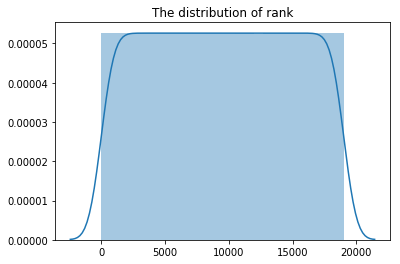

(-18.0, 1900.9]       1900
(1900.9, 3800.8]      1900
(3800.8, 5700.7]      1900
(5700.7, 7600.6]      1900
(7600.6, 9500.5]      1900
(9500.5, 11400.4]     1900
(11400.4, 13300.3]    1900
(13300.3, 15200.2]    1900
(15200.2, 17100.1]    1900
(17100.1, 19000.0]    1900
Name: rank, dtype: int64


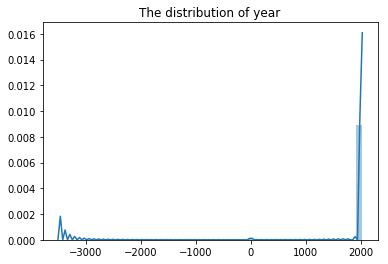

(-3505.5220000000004, -2947.9]        2
(-2947.9, -2395.8]                    1
(-2395.8, -1843.7]                    1
(-1843.7, -1291.6]                    2
(-1291.6, -739.5]                     0
(-739.5, -187.4]                      0
(-187.4, 364.7]                     162
(364.7, 916.8]                        8
(916.8, 1468.9]                       9
(1468.9, 2021.0]                  18815
Name: year, dtype: int64


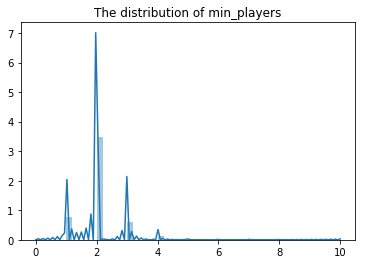

(-0.011, 1.0]     2987
(1.0, 2.0]       13206
(2.0, 3.0]        2260
(3.0, 4.0]         441
(4.0, 5.0]          53
(5.0, 6.0]          21
(6.0, 7.0]          13
(7.0, 8.0]          17
(8.0, 9.0]           1
(9.0, 10.0]          1
Name: min_players, dtype: int64


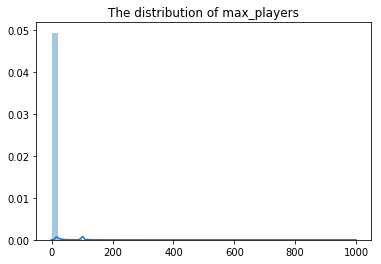

(-1.0, 99.9]      18980
(99.9, 199.8]        15
(199.8, 299.7]        1
(299.7, 399.6]        1
(399.6, 499.5]        0
(499.5, 599.4]        0
(599.4, 699.3]        0
(699.3, 799.2]        0
(799.2, 899.1]        0
(899.1, 999.0]        3
Name: max_players, dtype: int64


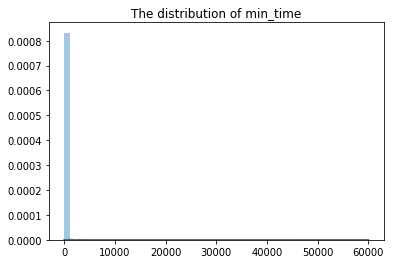

(-60.001, 6000.0]     18997
(6000.0, 12000.0]         1
(12000.0, 18000.0]        1
(18000.0, 24000.0]        0
(24000.0, 30000.0]        0
(30000.0, 36000.0]        0
(36000.0, 42000.0]        0
(42000.0, 48000.0]        0
(48000.0, 54000.0]        0
(54000.0, 60000.0]        1
Name: min_time, dtype: int64


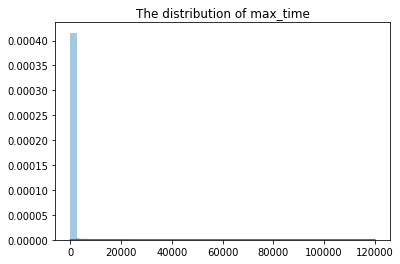

(-120.001, 12000.0]     18995
(12000.0, 24000.0]          3
(24000.0, 36000.0]          0
(36000.0, 48000.0]          0
(48000.0, 60000.0]          1
(60000.0, 72000.0]          0
(72000.0, 84000.0]          0
(84000.0, 96000.0]          0
(96000.0, 108000.0]         0
(108000.0, 120000.0]        1
Name: max_time, dtype: int64


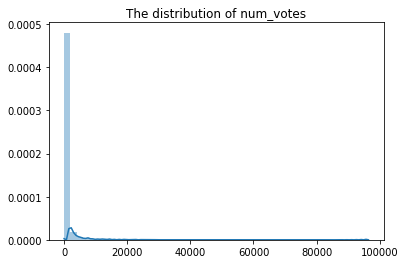

(-66.328, 9662.7]     18693
(9662.7, 19295.4]       188
(19295.4, 28928.1]       66
(28928.1, 38560.8]       24
(38560.8, 48193.5]       11
(48193.5, 57826.2]        8
(57826.2, 67458.9]        4
(67458.9, 77091.6]        2
(77091.6, 86724.3]        1
(86724.3, 96357.0]        3
Name: num_votes, dtype: int64


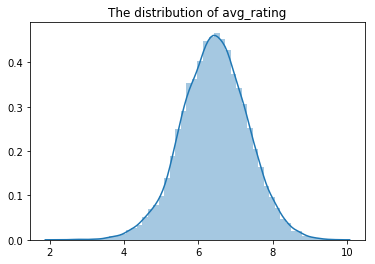

(2.259, 3.009]       8
(3.009, 3.751]      45
(3.751, 4.493]     289
(4.493, 5.235]    1231
(5.235, 5.977]    4075
(5.977, 6.719]    6278
(6.719, 7.461]    4800
(7.461, 8.203]    1853
(8.203, 8.945]     381
(8.945, 9.688]      40
Name: avg_rating, dtype: int64


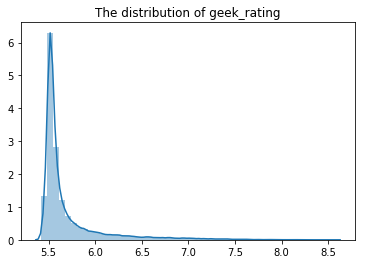

(5.417999999999999, 5.736]    14828
(5.736, 6.051]                 2047
(6.051, 6.366]                  887
(6.366, 6.68]                   509
(6.68, 6.995]                   341
(6.995, 7.31]                   215
(7.31, 7.624]                   111
(7.624, 7.939]                   44
(7.939, 8.254]                   14
(8.254, 8.568]                    4
Name: geek_rating, dtype: int64


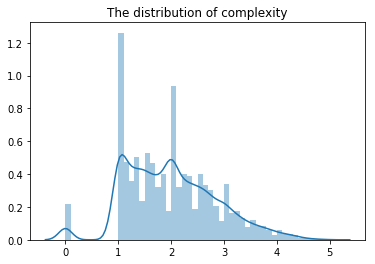

(-0.006, 0.5]     418
(0.5, 1.0]       2105
(1.0, 1.5]       3930
(1.5, 2.0]       4402
(2.0, 2.5]       3165
(2.5, 3.0]       2668
(3.0, 3.5]       1302
(3.5, 4.0]        706
(4.0, 4.5]        259
(4.5, 5.0]         45
Name: complexity, dtype: int64


In [134]:
for col in df.select_dtypes(np.number).columns:
    sns.distplot(df[col])
    plt.title(f"The distribution of {col}")
    plt.xlabel("")
    plt.show()
    print(df[col].value_counts(bins=10, sort=False))

> To further investigate:
- the difference between geek_rating and avg_rating
- board games with years in the negative
- what board games have max players over 20 people? sounds like it wouldn't fit on a board
- what board game has a minimum time of 6000 minutes?! 
- it appears some board games have a complexity of zero

#### Geek vs average rating

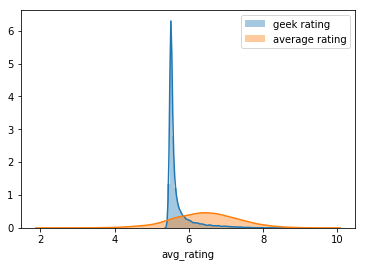

In [135]:
sns.distplot(df.geek_rating)
sns.distplot(df.avg_rating)
plt.legend(["geek rating", "average rating"])
plt.show()

> I expectd the geek rating to be more normally distributed. Since it is NOT normally distributed, the geek rating cannot be tested for statistical significance. 

#### Board games with negative years

In [136]:
df [df.year < 0]

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
161,Go,162,-2200,2,2,30,180,[(Uncredited)],[Abstract Strategy],"[Enclosure, Square Grid]","[(Public Domain), (Self-Published), (Unknown),...",appearance two player taking turn laying stone...,14317,7.63498,7.32983,3.9978
1240,Backgammon,1241,-3000,2,2,30,30,[(Uncredited)],"[Abstract Strategy, Dice]","[Advantage Token, Betting and Bluffing, Dice R...","[(Public Domain), (Unknown), 3M, Alga, Ariel P...",backgammon classic abstract strategy game dati...,11219,6.53495,6.36491,2.0221
7728,Senet,7729,-3500,2,2,30,30,[(Uncredited)],"[Abstract Strategy, Religious]","[Dice Rolling, Roll / Spin and Move]","[(Public Domain), (Self-Published), ABRA, Cada...",senet ancient egyptian board game similar back...,633,5.84678,5.57981,1.4839
11686,The Royal Game of Ur,11687,-2600,2,2,30,30,[(Uncredited)],"[Abstract Strategy, Dice]","[Dice Rolling, Roll / Spin and Move]","[(Public Domain), (Self-Published), Bibelot Ga...",game published different name simple race game...,499,5.79012,5.53126,1.3158
13842,Petteia,13843,-100,2,2,20,20,[Moshe Callen],[Abstract Strategy],"[Action Queue, Area Majority / Influence]","[(Public Domain), Geoludie, L. P. Septímio, ne...",roughly translated 'robbers' abstract battle g...,48,6.13542,5.51554,2.1667
18660,Three Men's Morris,18661,-1400,2,2,5,5,[(Uncredited)],[Abstract Strategy],"[Pattern Building, Point to Point Movement]","[(Public Domain), Mitra]",ancient game probably direct ancestor better k...,57,4.33877,5.45128,1.2500
18991,Nine Men's Morris,18992,-1400,2,2,20,20,[(Uncredited)],[Abstract Strategy],"[Pattern Building, Point to Point Movement]","[(Public Domain), ABRA, Adrenaline Brush Ltd, ...",nine men's morris old game played thousand yea...,1227,5.36926,5.42304,1.8421


> I thought these were typos. Research of a couple of these games show that they are indeed that old. These dates appear appropriate. However, as outliers, they do skew the data, as I'm interested in analyzing the success of current games.

> Games older than 1950 will be removed. More may be removed later. 

In [137]:
df = df [df.year > 1950]

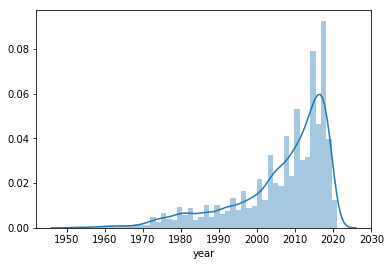

In [138]:
sns.distplot(df.year)
plt.show()

> This is definitely more focused now. It is seen that the popularity of board games have been steadily increasing.

#### Board games with a high number of max players

In [139]:
df [df.max_players > 20]

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
122,Welcome To...,123,2018,1,100,25,25,[Benoit Turpin],[City Building],"[Bingo, Paper-and-Pencil, Pattern Building, So...","[Blue Cocker Games, Broadway Toys LTD, Deep Wa...",architect welcome want build best new town uni...,13999,7.63987,7.41522,1.8303
184,Cartographers: A Roll Player Tale,185,2019,1,100,30,45,[Jordy Adan],"[Fantasy, Territory Building]","[Bingo, Grid Coverage, Line Drawing, Paper-and...","[Thunderworks Games, Buró, Gen-X Games, Grok G...",queen gimnax ordered reclamation northern land...,6093,7.74987,7.28256,1.8864
663,Ricochet Robots,664,1999,1,99,30,30,[Alex Randolph],"[Abstract Strategy, Maze, Puzzle, Real-time]","[Grid Movement, Modular Board]","[Hans im Glück, ABACUSSPIELE, Devir, Gém Klub ...",ricochet robot le game puzzle explains there's...,7783,7.00340,6.73219,2.4201
855,Two Rooms and a Boom,856,2013,6,30,7,20,"[Alan Gerding, Sean McCoy]","[Bluffing, Card Game, Deduction, Negotiation, ...","[Acting, Elapsed Real Time Ending, Team-Based ...",[Tuesday Knight Games],two room boom ndash social deductionhidden rol...,4118,7.01645,6.58527,1.4252
921,Ultimate Werewolf: Ultimate Edition,922,2008,5,68,30,90,[Ted Alspach],"[Bluffing, Card Game, Deduction, Horror, Murde...","[Hidden Roles, Player Elimination, Role Playin...","[Bézier Games, Arclight, Ediciones MasQueOca, ...",quiet little 16th century village suddenly bec...,3675,7.03310,6.54743,1.4968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18813,Bop It!,18814,1996,1,99,5,10,[Dan Klitsner],"[Action / Dexterity, Electronic]",[Real-Time],[Hasbro],parker brothers1010get ready react fast turn b...,170,5.08449,5.44237,1.0000
18846,Hipster Dice,18847,2014,3,99,30,60,[Samuel Mitschke],[Dice],"[Dice Rolling, Storytelling]","[Edge Entertainment, Steve Jackson Games]",game description publisher1010based undergroun...,75,4.24187,5.43944,1.2000
18917,Yeti in My Spaghetti,18918,2015,2,99,15,15,[(Uncredited)],"[Action / Dexterity, Children's Game]",[Player Elimination],"[Magellan, Megableu, Patch Products, PlayMonster]",one know yeti sitting spaghetti spaghetti laid...,208,5.00452,5.43396,1.0000
18924,Jenga: Tetris,18925,2013,1,99,20,20,[],"[Action / Dexterity, Party Game, Video Game Th...",[Push Your Luck],[Hasbro],player play jenga different block shaped 6 tet...,184,4.95924,5.43349,1.5000


> There are 210 games that have greater than 20 players. As I define a board game as something that can be played sitting at a table, I consider these high player games to be an outlier and will remove them. 

In [140]:
df = df [df.max_players <= 20]

#### Board games with high playing times 

In [141]:
df [df.min_time > 10000]

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity
5733,1914: Offensive à outrance,5734,2013,2,4,17280,17280,[Michael Resch],"[Wargame, World War I]","[Dice Rolling, Hexagon Grid, Simulation]",[GMT Games],gmt website10101914 offensive agrave outrance ...,101,8.04356,5.63924,3.9231
9272,Drang Nach Osten!,9273,1973,2,4,12000,12000,"[Rich Banner, Frank Chadwick]","[Wargame, World War II]","[Dice Rolling, Hexagon Grid, Simulation]",[Game Designers' Workshop],introduction1010drang nach osten historical ga...,74,6.78919,5.55462,4.2222
14386,The Campaign for North Africa: The Desert War ...,14387,1979,8,10,60000,60000,[Richard H. Berg],"[Wargame, World War II]",[Hexagon Grid],"[SPI (Simulations Publications, Inc.)]",war game like although map big 10 foot 3048 ga...,143,6.01476,5.51165,4.6629


> These games are terribly long, and will skew the data. Will remove.

In [158]:
df [df.max_time > 10000]

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity,desc_length
1220,Empires in Arms,1235,1983,2,7,120,12000,"[Greg Pinder, Harry Rowland]","[Economic, Napoleonic, Negotiation, Political,...","[Area Movement, Dice Rolling, Movement Points,...","[Australian Design Group, The Avalon Hill Game...",back box avalon hill edition1010empires arm ga...,1226,7.58425,6.36806,4.4118,289
2983,Case Blue,3032,2007,1,2,1440,22500,[Dean Essig],"[Wargame, World War II]","[Dice Rolling, Hexagon Grid, Simulation]","[The Gamers, Multi-Man Publishing]",mmp web site1010from 1941 1943 army group sout...,285,8.24762,5.87082,4.5821,311
6677,1985: Under an Iron Sky,6818,2018,2,6,120,120000,"[Marco Cimmino, Fabrizio Vianello]","[Modern Warfare, Wargame]","[Dice Rolling, Hexagon Grid, Simulation, Zone ...",[Thin Red Line Games],10quotthe increasing destabilization political...,73,9.16301,5.60165,4.2727,297
7796,Atlantic Wall: D-Day to Falaise,7968,2014,2,6,120,14400,[Joe Youst],"[Wargame, World War II]","[Hexagon Grid, Zone of Control]",[Decision Games (I)],decision games' website1010on 6 june 1944 grea...,64,7.90078,5.57512,4.8750,236


> The range of time in these games is wild. Based on their very long max times, will remove. 

In [161]:
df = df [(df.min_time < 10000) & (df.max_time < 10000)]

#### Board games with a complexity of zero

In [163]:
df [df.complexity == 0]

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity,desc_length


> Games should not have a complexity of zero. Removing these games. 

In [164]:
df = df [df.complexity != 0]

In [165]:
len(df)

18064

> After removing outliers and bad data, there is still about 18k games to analyze. 

In [146]:
# reset index due to missing rows
df = df.reset_index().drop(columns='index')

#### Feature Engineering

How long is each readme? 

In [147]:
#add in a column that calculates the length of the description, stop words have already been removed
explore.description_length(df)

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity,desc_length
0,Gloomhaven,1,2017,1,4,60,120,[Isaac Childres],"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Action Queue, Action Retrieval, Campaign / Ba...","[Cephalofair Games, Albi, Albi Polska, Asmodee...",gloomhaven game euroinspired tactical combat p...,37193,8.82008,8.56841,3.8375,136
1,Pandemic Legacy: Season 1,2,2015,2,4,60,60,"[Rob Daviau, Matt Leacock]","[Environmental, Medical]","[Action Points, Cooperative Game, Hand Managem...","[Z-Man Games, Inc., Asterion Press, Devir, Fil...",pandemic legacy cooperative campaign game over...,38451,8.62011,8.46882,2.8291,176
2,Brass: Birmingham,3,2018,2,4,60,120,"[Gavan Brown, Matt Tolman, Martin Wallace]","[Economic, Industry / Manufacturing, Transport...","[Connections, Hand Management, Income, Loans, ...","[Roxley, Arclight, BoardM Factory, Conclave Ed...",brass birmingham economic strategy game sequel...,14661,8.63951,8.30705,3.9224,297
3,Terraforming Mars,4,2016,1,5,120,120,[Jacob Fryxelius],"[Economic, Environmental, Industry / Manufactu...","[Card Drafting, End Game Bonuses, Hand Managem...","[FryxGames, Arclight, Fantasmagoria, Ghenos Ga...",2400s mankind begin terraform planet mar giant...,57566,8.43130,8.28181,3.2354,280
4,Twilight Imperium (Fourth Edition),5,2017,3,6,240,480,"[Dane Beltrami, Corey Konieczka, Christian T. ...","[Civilization, Economic, Negotiation, Politica...","[Action Drafting, Area Majority / Influence, A...","[Fantasy Flight Games, ADC Blackfire Entertain...",twilight imperium fourth edition game galactic...,11537,8.69014,8.21516,4.2168,266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18064,The Curse of the Ruby Rhino,18996,2007,2,5,10,10,[Ken Brunson],"[Adventure, Dice]",[Dice Rolling],[Gamewright],behold ruby rhino coveted ancient treasure sta...,72,3.85347,5.42200,1.0000,36
18065,Wit's End,18997,1995,2,6,60,60,[Mike Cramer],[Trivia],[Roll / Spin and Move],"[Game Development Group, Inc., Pierre Belvédère]",wit's end player start outer ring square gameb...,260,5.04372,5.42200,1.9167,47
18066,Dixie: The Second War Between the States,18998,1976,2,2,60,120,[Redmond A. Simonsen],[Wargame],[Hexagon Grid],"[SPI (Simulations Publications, Inc.)]",dixie appeared strategy amp tactic magazine 54...,116,4.46897,5.42195,2.3889,53
18067,Whatzit?,18999,1987,3,6,30,30,"[Michel Laclos, Liliane Laclos, Paul Sellers]","[Card Game, Humor, Memory, Party Game, Puzzle,...",[Memory],"[Borras Plana S.A., Damm / Egmont, Habourdin I...",whatzittrade cunningly disguised name phrase s...,262,5.01884,5.42183,1.6250,210


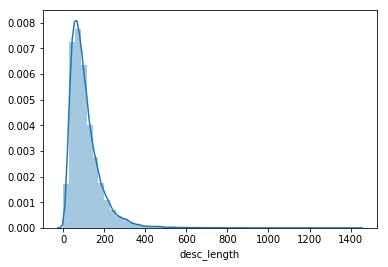

In [148]:
sns.distplot(df.desc_length)
plt.show()

#### Correlations

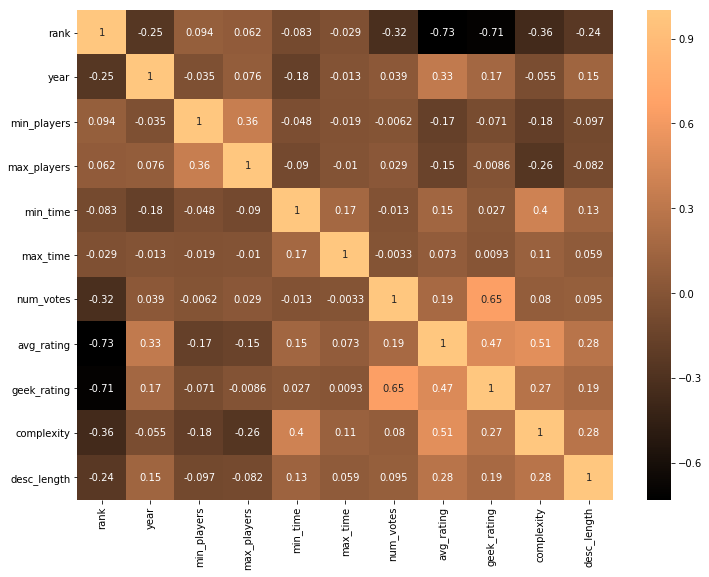

In [149]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True, cmap="copper")
plt.show()

Takeaways
- The geek_rating and avg_rating have a high correlation with rank, as they should, since the rank is based on the ratings.
- There is some correlation with the geek_rating and avg_rating and votes. This makes sense as the geek_rating is a weighted value based on the those two features. 
- There is also some correlation between min_time and max_time, which also makes sense, as games times typically fall into a relatively small range. 
- There is correlation between the complexity and avg_rating. However, the complexity doesn't affect the geek_rating as much. 

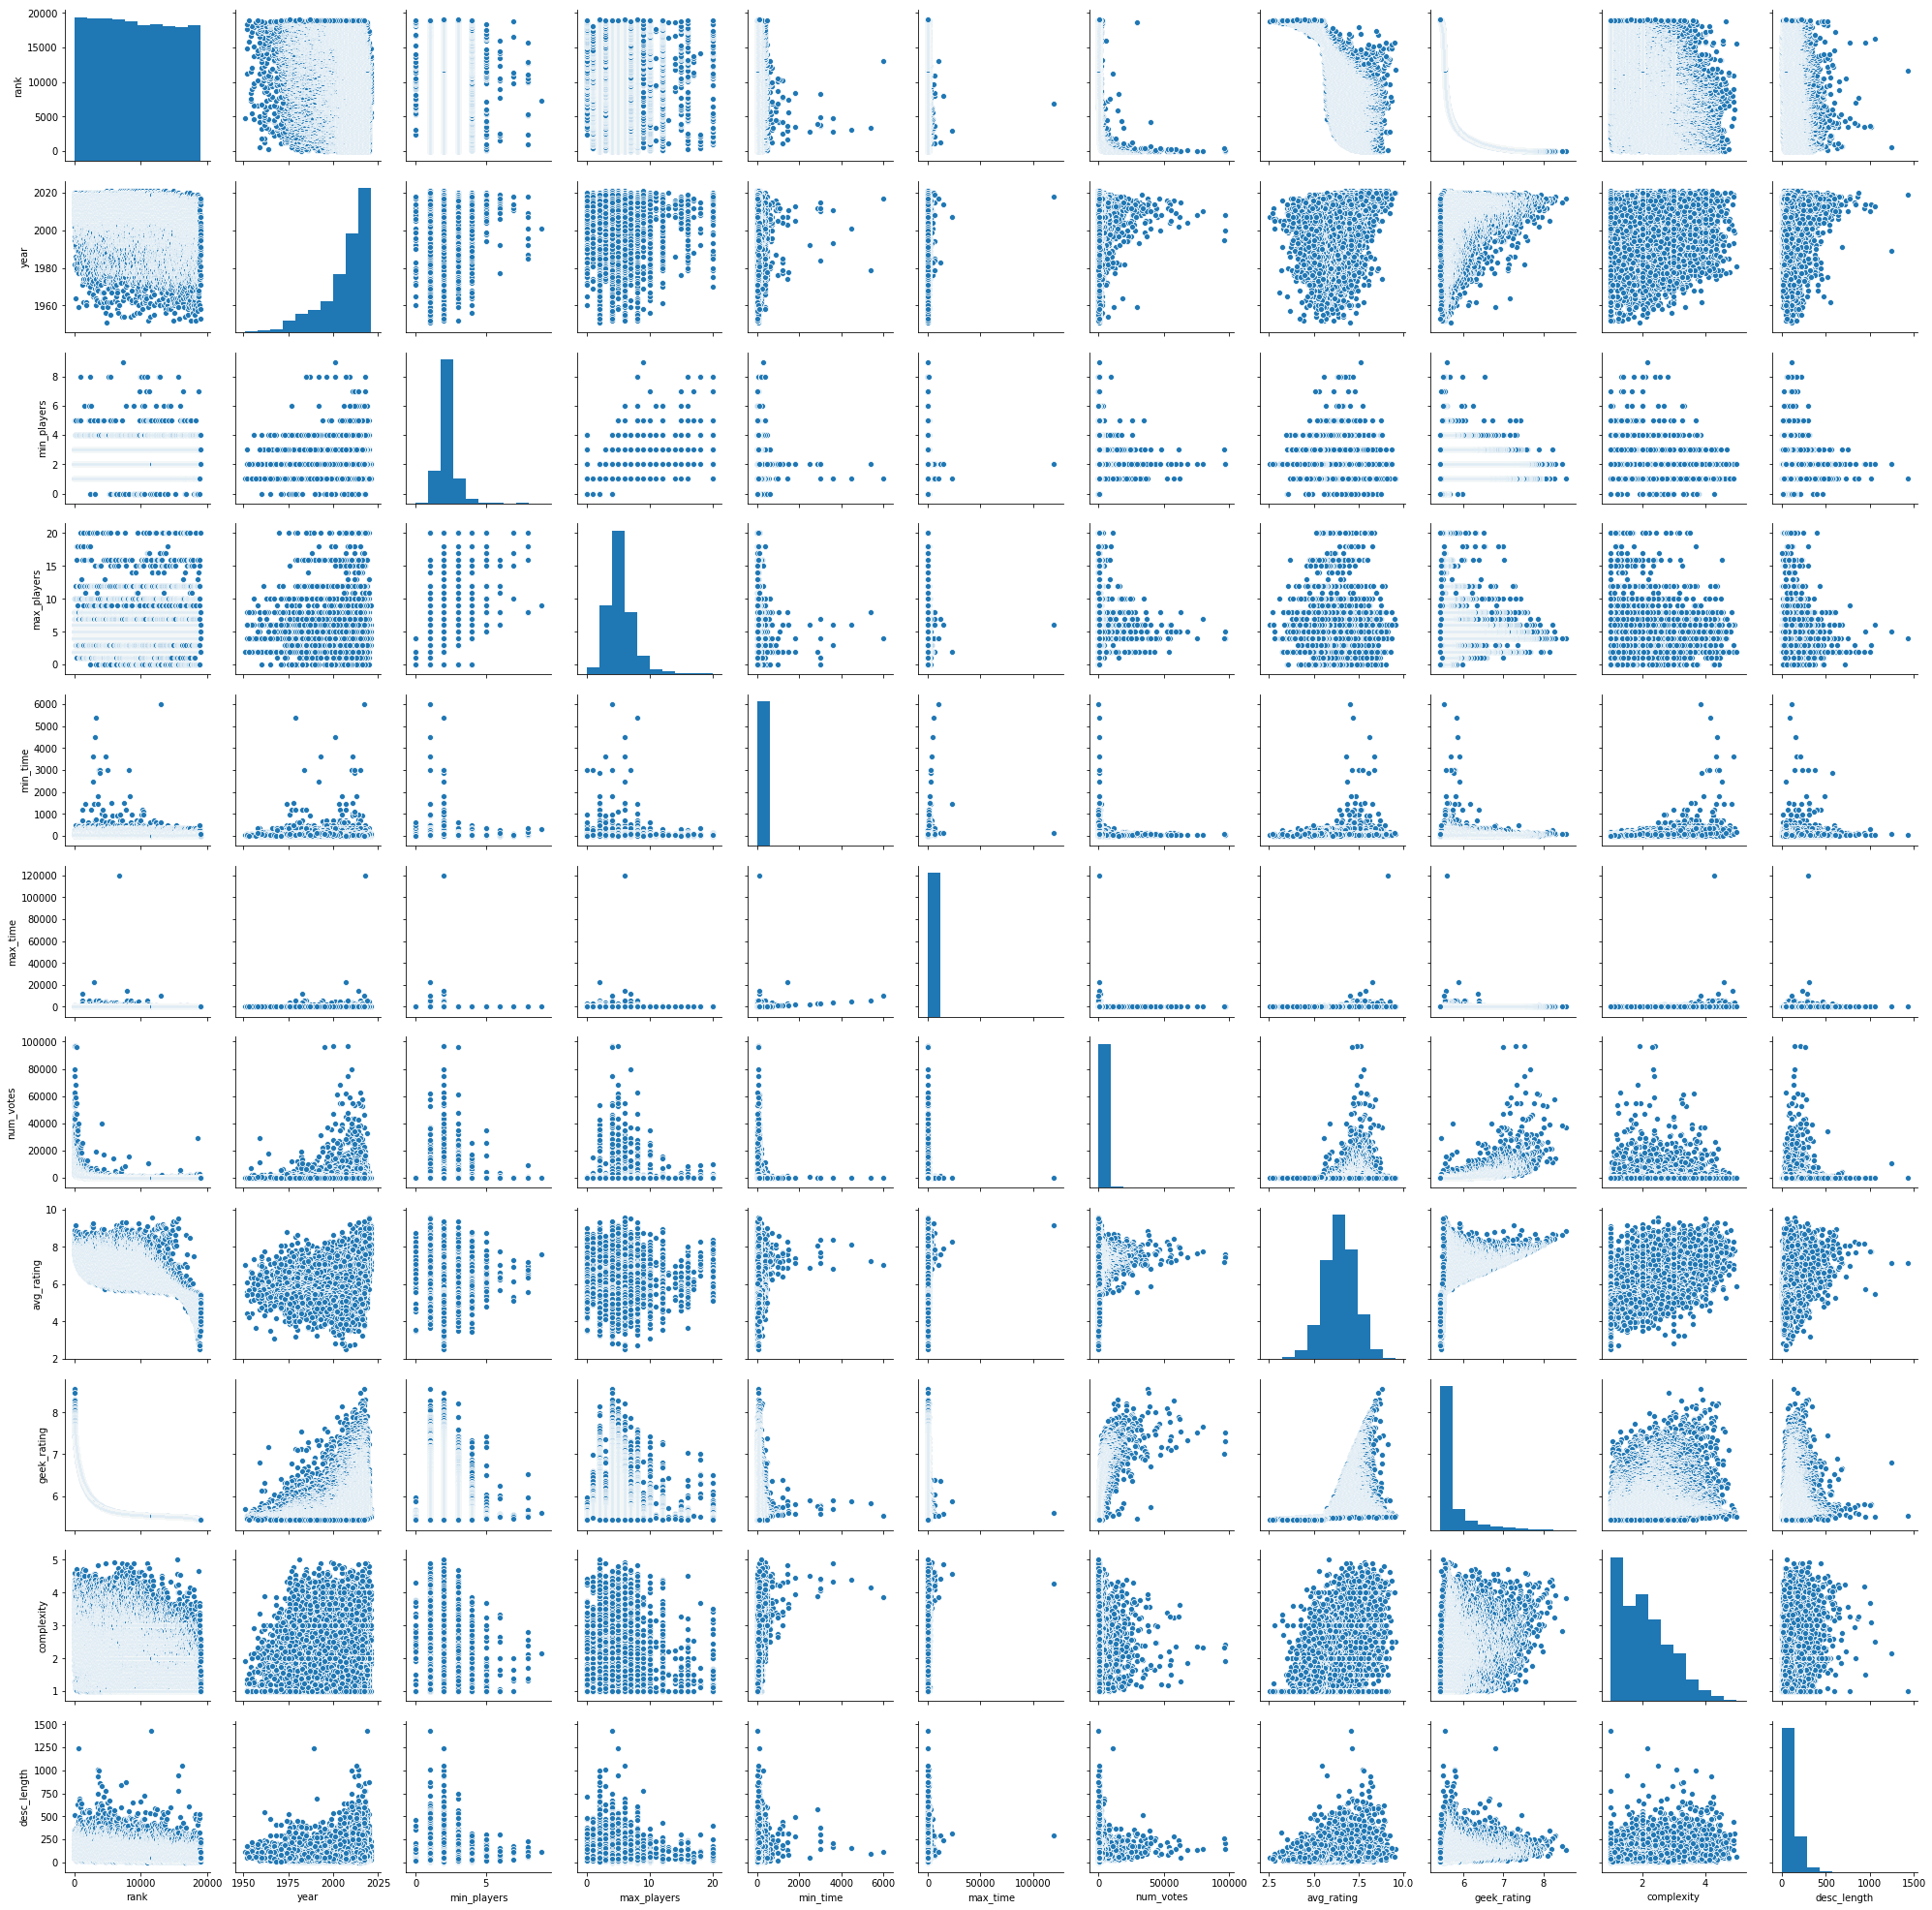

In [150]:
sns.pairplot(df)
plt.show()

> The overwhelming pairplot. Let's dive into some of the more interesting plots.

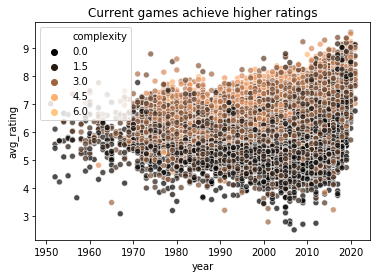

In [151]:
sns.scatterplot(data=df, x='year', y='avg_rating',hue='complexity', palette='copper', alpha=.7)
plt.title("Current games achieve higher ratings")
plt.show()

> I believe with the explosion of board games, designers forced to think outside the box, and therefore, getting more creative. This is leading to more originality and more fun, and higher ranked games in the recent years. 

> Surprisingly, it appears that higher ranked games tend to be more complex. Is it partly due to the type of folks who are probably utilizing boardgamegeek? They're more likely to be avid board game players and appreciate more complexity. 

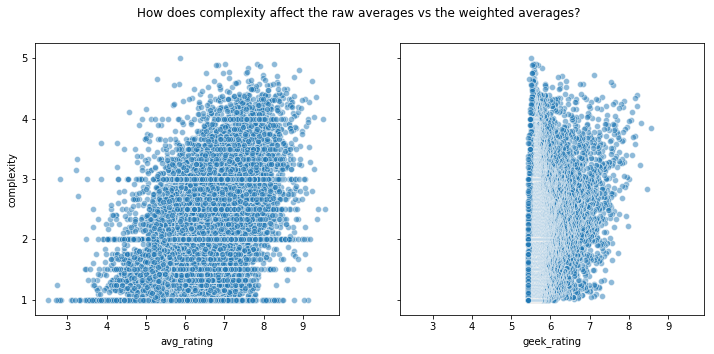

In [153]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True, sharex=True)

sns.scatterplot(data=df, x='avg_rating', y='complexity', alpha=.5, ax=ax[0])
sns.scatterplot(data=df, x='geek_rating', y='complexity', alpha=.5, ax=ax[1])

fig.suptitle('How does complexity affect the raw averages vs the weighted averages?')
plt.show()

> Before the averages are weighted (avg_rating), it is seen that more complex games are consistently rater higher. The geek rating seems to be unhelpful as it skews many games to the 5.5 rating. 

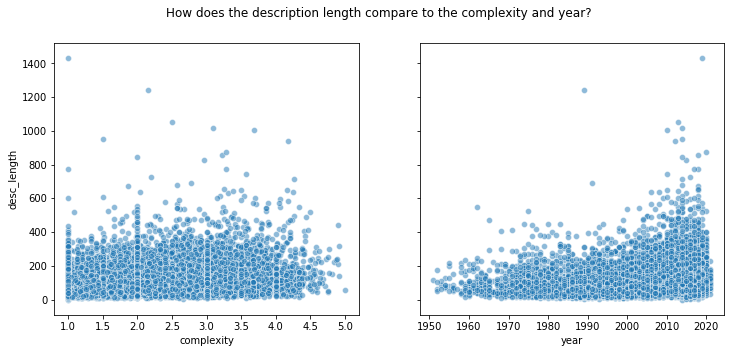

In [154]:
fig, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

sns.scatterplot(data=df, y='desc_length', x='complexity', alpha=.5, ax=ax[0])
sns.scatterplot(data=df, y='desc_length', x='year', alpha=.5, ax=ax[1])

fig.suptitle('How does the description length compare to the complexity and year?')
plt.show()

> The description length is fairly consistent regardless of complexity, but does get more in-depth as time goes on. 

#### Investigate game times

In [155]:
df.max_time.agg(["mean","median"])

mean      95.056063
median    45.000000
Name: max_time, dtype: float64

> The mean game time of an hour and a half is shorter than I expected

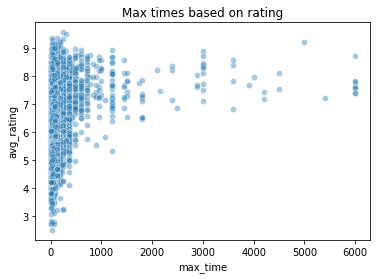

In [178]:
sns.scatterplot(data=df, x='max_time', y='avg_rating', alpha=.4)
plt.title('Max times based on rating')
plt.show()

> The relatively long games are never poorly rated. Interesting. 

In [188]:
df [(df.avg_rating > 6) & (df.avg_rating < 7)].max_time.agg(["mean","median"])

mean      68.379828
median    45.000000
Name: max_time, dtype: float64

In [189]:
df [(df.avg_rating > 7) & (df.avg_rating < 8)].max_time.agg(["mean","median"])

mean      137.804781
median     60.000000
Name: max_time, dtype: float64

In [190]:
df [(df.avg_rating > 8) & (df.avg_rating < 9)].max_time.agg(["mean","median"])

mean      252.407634
median    120.000000
Name: max_time, dtype: float64

In [191]:
df [df.avg_rating > 9].max_time.agg(["mean","median"])

mean      299.074074
median    120.000000
Name: max_time, dtype: float64

> As the avg_rating increases, so does the mean and median game time. 

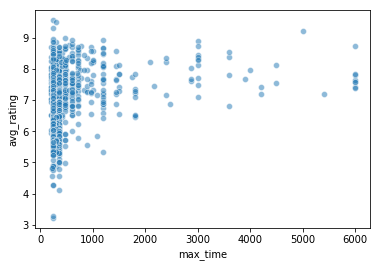

In [192]:
sns.scatterplot(data=df[(df.max_time > 180)], x='max_time', y='avg_rating', alpha=.5)
plt.show()

> For games over three hours, it is seen that they span all rankings.

#### Most popular designers

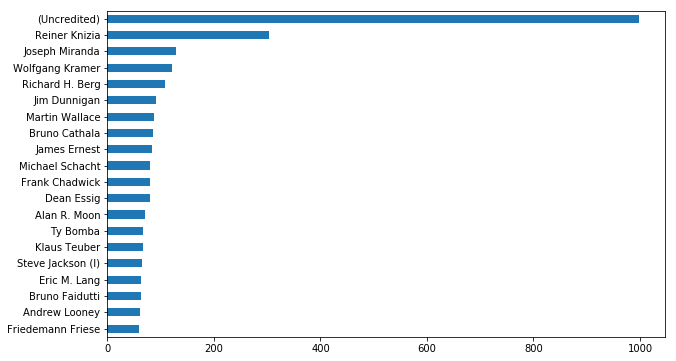

In [207]:
# pull designers out of lists
designers = [des for game in df.designer for des in game]
des_count = pd.Series(designers).value_counts()

# plot the most commonly seen designers
plt.figure(figsize=(10,6))
des_count.head(20).sort_values().plot.barh()
plt.show()

> Removing the uncredited status while investigating designers. 

In [208]:
des_count = des_count.drop('(Uncredited)')

> Reiner Knizia is the top designer of board games. Let's look at some of their stats. 

In [209]:
# dataframe with all reiner knizia games
df_rknizia = df [df.designer.apply(lambda x: "Reiner Knizia" in x)]

In [210]:
print("Reiner Knizia has published {} games. That's a lot.".format(len(df_rknizia)))

Reiner Knizia has published 303 games. That's a lot.


In [211]:
categories = [cat for game in df_rknizia.category for cat in game]
pd.Series(categories).value_counts().head(20)

Card Game                    121
Children's Game               43
Dice                          42
Abstract Strategy             42
Animals                       37
Fantasy                       36
Ancient                       21
Bluffing                      19
Adventure                     18
Racing                        15
Medieval                      14
Movies / TV / Radio theme     13
Memory                        13
Mythology                     12
Novel-based                   10
Deduction                     10
Science Fiction               10
Real-time                     10
Exploration                   10
Puzzle                         9
dtype: int64

> Definitely see some reoccurring themes in their work. 

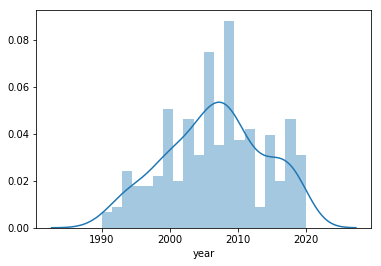

In [212]:
sns.distplot(df_rknizia.year, bins=20)
plt.show()

> They were making games before the rise in the 2000s, but have continued to be prolific. 

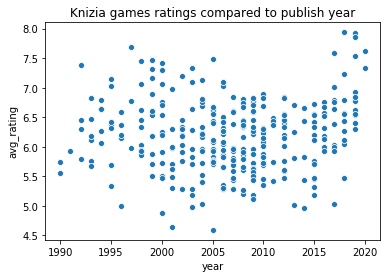

In [213]:
sns.scatterplot(data=df_rknizia, x='year', y="avg_rating")
plt.title("Knizia games ratings compared to publish year")
plt.show()

#### Ten most popular designer ranking distribution

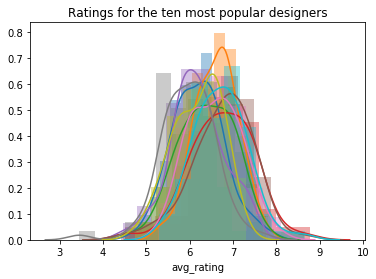

In [217]:
ten_pop_designer = des_count.head(10).index

for des in ten_pop_designer:
    mask = df.designer.apply(lambda x: des in x)
    sns.distplot(df[mask].avg_rating)

plt.title("Ratings for the ten most popular designers")
plt.show()

> This graph was just for fun, to see how the ratings amoungst the popular designers vary.

#### Designer of top game

In [215]:
df.designer[0]

['Isaac Childres']

In [216]:
# dataframe with all isaac childres games
df [df.designer.apply(lambda x: "Isaac Childres" in x)]

,name,rank,year,min_players,max_players,min_time,max_time,designer,category,mechanic,publisher,description,num_votes,avg_rating,geek_rating,complexity,desc_length
0,Gloomhaven,1,2017,1,4,60,120,[Isaac Childres],"[Adventure, Exploration, Fantasy, Fighting, Mi...","[Action Queue, Action Retrieval, Campaign / Ba...","[Cephalofair Games, Albi, Albi Polska, Asmodee...",gloomhaven game euroinspired tactical combat p...,37193,8.82008,8.56841,3.8375,136
194,Gloomhaven: Jaws of the Lion,199,2020,1,4,30,120,[Isaac Childres],"[Adventure, Exploration, Fantasy, Fighting]","[Action Queue, Campaign / Battle Card Driven, ...","[Cephalofair Games, Albi Polska, Feuerland Spi...",gloomhaven jaw lion standalone game take place...,1733,9.16393,7.25128,3.5253,117
1209,Forge War,1224,2015,1,4,60,180,[Isaac Childres],"[Adventure, Economic, Fantasy, Industry / Manu...","[Grid Movement, Modular Board, Role Playing, V...",[Cephalofair Games],forge war player take role blacksmith kingdom ...,1474,7.29429,6.37206,3.7615,119
1520,Founders of Gloomhaven,1540,2018,1,4,90,120,[Isaac Childres],"[City Building, Economic, Fantasy]","[Auction/Bidding, Deck, Bag, and Pool Building...",[Cephalofair Games],description publisher1010founders gloomhaven c...,2293,6.77547,6.24068,4.1287,98
4780,Frosthaven,4877,2021,1,4,30,120,"[Ella Galang Ampongan, Isaac Childres]","[Adventure, Exploration, Fantasy, Fighting, Mi...","[Campaign / Battle Card Driven, Cooperative Ga...","[Cephalofair Games, Albi, Albi Polska, Feuerla...",frosthaven story small outpost far north capit...,321,7.02904,5.68458,3.4828,179
9974,Return to Dark Tower,10264,2021,1,4,100,120,"[Isaac Childres, Noah Cohen, Rob Daviau, Justi...","[Adventure, Electronic, Fantasy, Fighting]","[Area Movement, Cooperative Game, Events, Push...",[Restoration Games],age tower lay ruin unbeknownst people realm gr...,45,7.87795,5.54318,3.0000,105


> Isaac Childres is the designer of the top-rated game on bbg. And has found success with their other games, as well. 

#### Categories

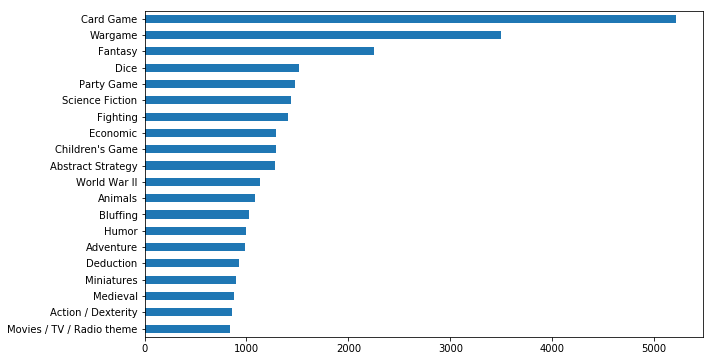

In [218]:
categories = [cat for game in df.category for cat in game]
cat_count = pd.Series(categories).value_counts()

plt.figure(figsize=(10,6))
cat_count.head(20).sort_values().plot.barh()
plt.show()

> Cards are a classic and super useful in all board games. Not surprisingly to see is as the top category. 

#### Statistical Analysis

In [219]:
from scipy import stats

H0: There is no difference on average board game ratings with games that have cards compared to games that do not have cards. 

In [220]:
cat_card_game = df [df.category.apply(lambda x: 'Card Game' in x)]
cat_not_card_game = df [df.category.apply(lambda x: 'Card Game' not in x)]

In [221]:
stats.ttest_ind(cat_card_game.avg_rating, cat_not_card_game.avg_rating)

Ttest_indResult(statistic=-11.450715367001434, pvalue=2.9659580336820496e-30)

> The p-value is practically zero, therefore, we can say there is a difference in average scores for games that have cards and games that do not. 

#### Test for statistical significance of the top ten game categories

In [222]:
cat_top_ten = pd.Series(categories).value_counts().head(10).index
cat_top_ten

Index(['Card Game', 'Wargame', 'Fantasy', 'Dice', 'Party Game',
       'Science Fiction', 'Fighting', 'Economic', 'Children's Game',
       'Abstract Strategy'],
      dtype='object')

> to be continued.. 

#### Mechanics

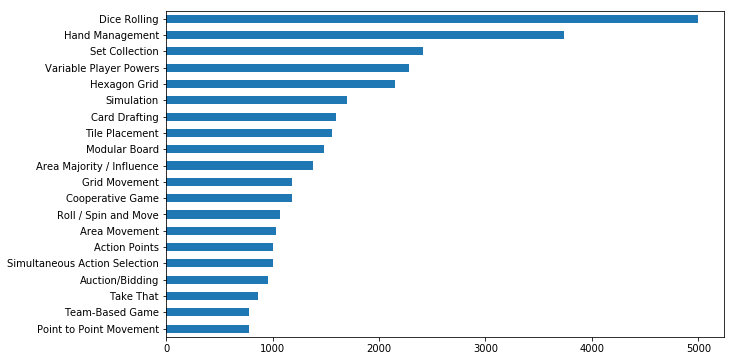

In [223]:
mechanics = [mech for game in df.mechanic for mech in game]
mech_count = pd.Series(mechanics).value_counts()

plt.figure(figsize=(10,6))
mech_count.head(20).sort_values().plot.barh()
plt.show()

In [224]:
mask = df.mechanic.apply(lambda x: "Hand Management" in x)
len(df[mask])/len(df)

0.20682019486271036

> Hand Management and Dice Rolling are the top two mechanics. These are standard game mechanics and expected to be at the top.

#### Description word cloud explosion

In [225]:
all_words = ' '.join(df.description)

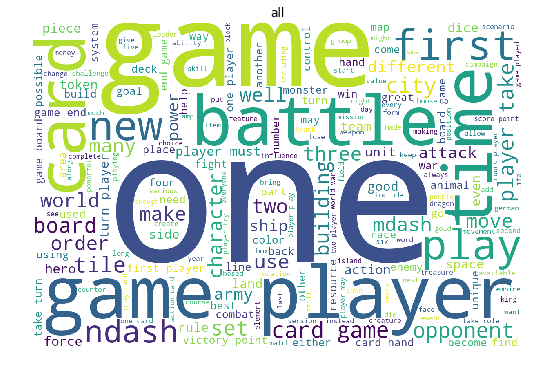

In [226]:
explore.one_word_one_cloud(all_words, "all")

> I'm unsure what 'ndash' refers to. 

In [227]:
all_words_bigram = pd.Series(nltk.ngrams(all_words.split(), 2)).value_counts().head(100)

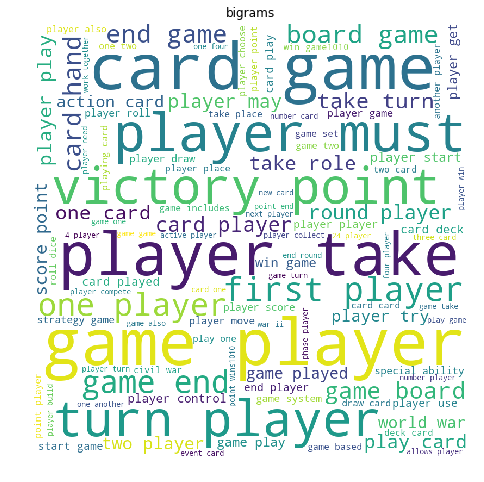

In [228]:
explore.two_word_one_cloud(all_words_bigram, "bigrams")

> As many times 'player' is seen in the bigrams, it's suprisingly it's not the top main word. 

In [229]:
all_words_trigram = pd.Series(nltk.ngrams(all_words.split(), 3)).value_counts().head(30)

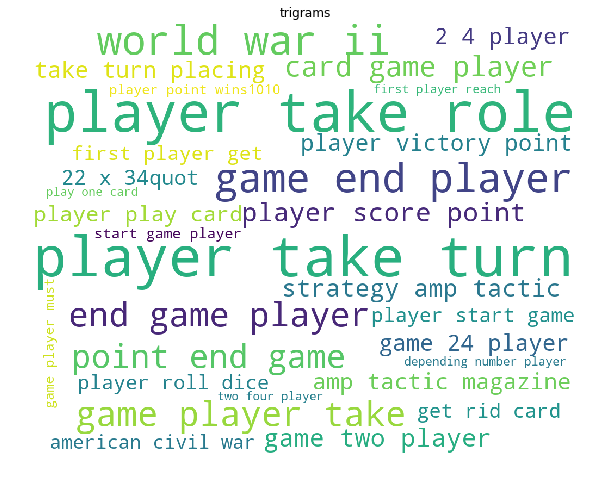

In [230]:
explore.three_word_one_cloud(all_words_trigram, "trigrams")

> I'm very surprised to see 'american civil war' here 

## Split

In [231]:
# set random state for repeatability
train, test = train_test_split(df, random_state=123)

Separate features and target. The avg_rating (which is used to establish rank) is used as the target value. The rank, avg_rating, and num_votes are all dropped from the X_train/test, as well, as they are not instrinic parameters of the game. 

In [232]:
X_train = train.drop(columns = ["rank", "avg_rating", "geek_rating", "num_votes"])
y_train = train[["avg_rating"]]
X_test = test.drop(columns = ["rank", "avg_rating", "geek_rating", "num_votes"])
y_test = test[["avg_rating"]]

## Model 1 - numeric values only

In [233]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train, y_train)

Train set model performance
RMSE: 0.680145527513993
  R2: 0.40477403635216735



> This model is okay. Adding in categories, mechanics, and designers should increase performance. 

## Model 2 - include categories only

In [234]:
# create of list of the top twenty categories
cat_list = list(cat_count.head(20).index)

In [235]:
# convert categories to binary matrix and merge into df
mlb = MultiLabelBinarizer()

X_train_cat = X_train.join(pd.DataFrame(mlb.fit_transform(X_train.category), 
                                        columns=mlb.classes_, 
                                        index=X_train.index)[cat_list])

X_test_cat = X_test.join(pd.DataFrame(mlb.fit_transform(X_test.category), 
                                        columns=mlb.classes_, 
                                        index=X_test.index)[cat_list])

In [236]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_cat, y_train)

Train set model performance
RMSE: 0.6662627839340444
  R2: 0.4288248769346584



> This model indeed performed a little better

## Model 3 - include mechanics only

In [237]:
# create of list of the top twenty mechanics
mech_list = list(mech_count.head(20).index)

In [238]:
# convert mechanics to binary matrix and merge into df
mlb = MultiLabelBinarizer()
X_train_mech = X_train.join(pd.DataFrame(mlb.fit_transform(X_train.mechanic),
                                         columns=mlb.classes_,
                                         index=X_train.index)[mech_list])

X_test_mech = X_test.join(pd.DataFrame(mlb.fit_transform(X_test.mechanic), 
                                        columns=mlb.classes_, 
                                        index=X_test.index)[mech_list])

In [239]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_mech, y_train)

Train set model performance
RMSE: 0.6645960761775258
  R2: 0.4316789798581625



> And this model performed a tad bit better. 

## Model 4 - include designers only

In [240]:
# create of list of the top twenty mechanics
des_list = list(des_count.head(10).index)

In [241]:
# convert designers to binary matrix and merge into df
mlb = MultiLabelBinarizer()
X_train_des = X_train.join(pd.DataFrame(mlb.fit_transform(X_train.designer),
                          columns=mlb.classes_,
                          index=X_train.index)[des_list])

X_test_des = X_test.join(pd.DataFrame(mlb.fit_transform(X_test.designer),
                          columns=mlb.classes_,
                          index=X_test.index)[des_list])

In [242]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_des, y_train)

Train set model performance
RMSE: 0.679263849921849
  R2: 0.40631622761523034



> The designers didn't perform as well as the other categories.

In [142]:
model.test_model_and_eval(lm, X_test_des, y_test)

Test set model performance
RMSE: 0.36122887771477524
  R2: 0.3535103384671572



## Model 5 - categories and mechanics

In [143]:
# combine categories and mechanics  
X_train_cat_mech = X_train_cat.join(pd.DataFrame(mlb.fit_transform(X_train.mechanic),
                                                 columns=mlb.classes_,
                                                 index=X_train.index)[mech_list])

X_test_cat_mech = X_test_cat.join(pd.DataFrame(mlb.fit_transform(X_test.mechanic),
                                                 columns=mlb.classes_,
                                                 index=X_test.index)[mech_list])

In [144]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_cat_mech, y_train)

Train set model performance
RMSE: 0.32775852171439523
  R2: 0.5074520600424651



> This improved the stand-alone category and mechanics model. 

## Model 6 - catergories and mechanics and designers

In [148]:
# combine categories and mechanics and designer
X_train_cat_mech_des = X_train_cat_mech.join(pd.DataFrame(mlb.fit_transform(X_train.designer),
                                                 columns=mlb.classes_,
                                                 index=X_train.index)[des_list])

X_test_cat_mech_des = X_test_cat_mech.join(pd.DataFrame(mlb.fit_transform(X_test.designer),
                                                 columns=mlb.classes_,
                                                 index=X_test.index)[des_list])

In [149]:
# model and evaluate 
lm = model.linear_model_and_eval(X_train_cat_mech_des, y_train)

Train set model performance
RMSE: 0.32582235528784487
  R2: 0.5132541244376152



> Anddddd this one performed the best

## Test

The model with basic stats, designers, categories, and mechanics performed best. This is selected as the final model and will be test. 

In [150]:
model.test_model_and_eval(lm, X_test_cat_mech_des, y_test)

Test set model performance
RMSE: 0.35084545458811967
  R2: 0.39014249984850347



> It is seen that the model overfit.

## Conclusions

- I found designers that I want to check out. 
- If I ever designed my own game, I'd opt for a two hour game with a slighly higher complexity. 
- Next step is to bin the target variable and try a classification model instead of regression. 
- Also, with more time, I would change the number of input features for the model, to alleviate some of the overfitting. 
- Future steps would be to remove the ascii code from the descriptions and then model. 

I enjoyed data sciencing on something that I can highly relate to and look forward to applying data science to more impactful areas.